# USER SEGMENTATION

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [14]:
# loading the data from csv file to a Pandas DataFrame
user_data = pd.read_csv("D:\plac\learning\Amazon_duster_model.csv")

In [15]:
# first 5 rows in the dataframe
user_data.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,53667,150
1,301220,F,32,50420,106
2,301221,M,23,62896,10
3,301222,M,32,55306,22
4,301223,F,34,20634,117


In [16]:
# finding the number of rows and columns
user_data.shape

(202, 5)

In [17]:
user_data.isnull().sum()

Cus_ID    0
Sex       0
Age       0
Income    0
Rating    0
dtype: int64

In [18]:
x=user_data.iloc[:,3:5].values

In [22]:
# finding wcss value for different number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=21)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


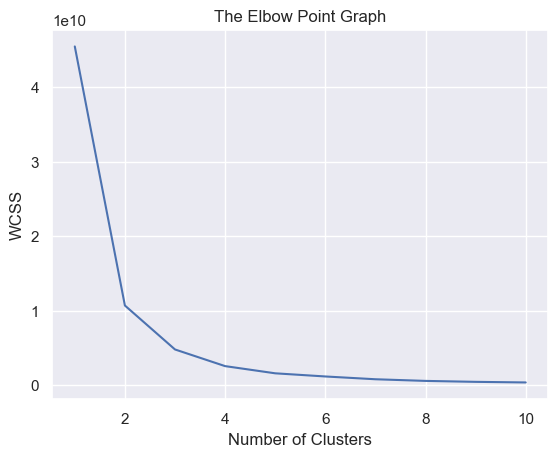

In [23]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_means=kmeans.fit_predict(x)

In [25]:
print(y_means)

[3 3 0 3 2 3 1 0 2 0 1 3 2 3 0 0 0 0 2 0 2 2 1 2 1 0 3 3 0 1 0 2 2 0 0 2 2
 3 2 0 0 3 1 3 1 1 3 3 2 2 2 3 2 3 0 2 2 2 0 0 3 3 1 2 0 1 0 2 0 1 3 1 0 3
 2 2 1 3 2 3 1 0 1 2 1 3 2 0 1 1 1 0 0 2 0 2 0 3 1 1 1 3 0 1 1 0 3 0 3 1 2
 3 1 0 0 0 1 1 3 0 3 0 3 1 3 3 3 3 1 0 1 1 0 2 0 1 3 3 2 0 3 3 2 1 2 3 3 3
 3 2 0 1 2 0 1 1 3 2 3 3 1 2 2 3 0 2 0 1 3 3 1 2 0 1 3 0 3 2 3 0 3 1 1 2 1
 1 2 3 0 1 2 0 2 0 0 2 0 2 3 1 0 2]


Visualizing all the Clusters

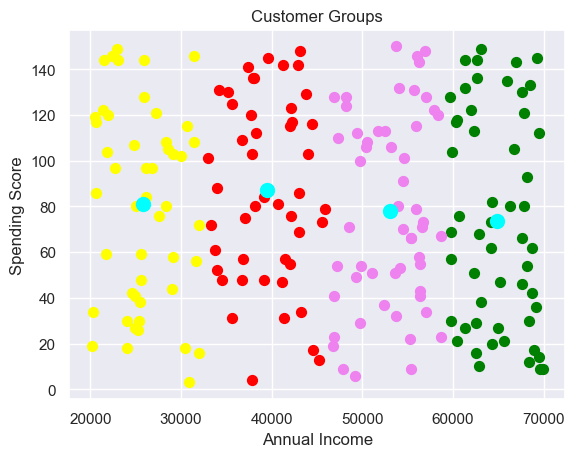

In [31]:
# plotting all the clusters and their Centroids

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50, c='green', label='Cluster 1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50, c='red', label='Cluster 2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50, c='violet', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()